In [8]:
import os
import numpy as np
import h5py

In [9]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [10]:
import umap

In [11]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger

In [12]:
home = os.getenv('HOME')
filepath1 = home +'/StarNet-UVic/'+'intri_comp_p'
#filepath2 = home +'/StarNet-UVic/'+'intri_1100_2100_3'
#filepath3 = home +'/StarNet-UVic/'+'intri_2100_3100_3'
#filepath4 = home +'/StarNet-UVic/'+'intri_3100_4100_3'
#filepath5 = home +'/StarNet-UVic/'+'intri_4100_6092_3'


In [13]:
f1 = h5py.File(filepath1, 'r')
#f2 = h5py.File(filepath2, 'r')
#f3 = h5py.File(filepath3, 'r')
#f4 = h5py.File(filepath4, 'r')
#f5 = h5py.File(filepath5, 'r')


In [14]:
dset1_a = f1['ambre_flux']
dset1_p = f1['phoenix_flux']
dset1_i = f1['intrigoss_flux']

In [17]:
dset2_a = f2['ambre_flux']
dset2_p = f2['phoenix_flux']
dset2_i = f2['intrigoss_flux']

In [18]:
dset3_a = f3['ambre_flux']
dset3_p = f3['phoenix_flux']
dset3_i = f3['intrigoss_flux']

In [19]:
dset4_a = f4['ambre_flux']
dset4_p = f4['phoenix_flux']
dset4_i = f4['intrigoss_flux']

In [20]:
dset5_a = f5['ambre_flux']
dset5_p = f5['phoenix_flux']
dset5_i = f5['intrigoss_flux']

In [15]:
flux_a_fin = []
flux_p_fin = []
flux_i_fin = []

for i in dset1_a:
    flux_a_fin.append(i)
for i in dset1_p:
    flux_p_fin.append(i)
for i in dset1_i:
    flux_i_fin.append(i)


In [22]:
for i in dset2_a:
    flux_a_fin.append(i)
for i in dset2_p:
    flux_p_fin.append(i)
for i in dset2_i:
    flux_i_fin.append(i)

In [23]:
for i in dset3_a:
    flux_a_fin.append(i)
for i in dset3_p:
    flux_p_fin.append(i)
for i in dset3_i:
    flux_i_fin.append(i)

In [24]:
for i in dset4_a:
    flux_a_fin.append(i)
for i in dset4_p:
    flux_p_fin.append(i)
for i in dset4_i:
    flux_i_fin.append(i)

In [25]:
for i in dset5_a:
    flux_a_fin.append(i)
for i in dset5_p:
    flux_p_fin.append(i)
for i in dset5_i:
    flux_i_fin.append(i)

In [16]:
flux_a_fin = np.asarray(flux_a_fin)
flux_p_fin = np.asarray(flux_p_fin)
flux_i_fin = np.asarray(flux_i_fin)

print(flux_a_fin.shape)
print(flux_p_fin.shape)
print(flux_i_fin.shape)


(0,)
(0,)
(368, 10000)


In [17]:
grid_data = []
for i in flux_i_fin:
    grid_data.append(i)
for j in flux_p_fin:
    grid_data.append(j)
for k in flux_a_fin:
    grid_data.append(k)

grid_data = np.asarray(grid_data)
print(grid_data.shape)

(368, 10000)


In [18]:
reducer = umap.UMAP(init = 'random')
embedding = reducer.fit_transform(grid_data)

In [19]:
embedding.shape

(368, 2)

In [20]:
grid_target=[]
for i in range(len(flux_i_fin)):
    grid_target.append(0)
for j in range(len(flux_p_fin)):
    grid_target.append(1)
for k in range(len(flux_a_fin)):
    grid_target.append(2)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

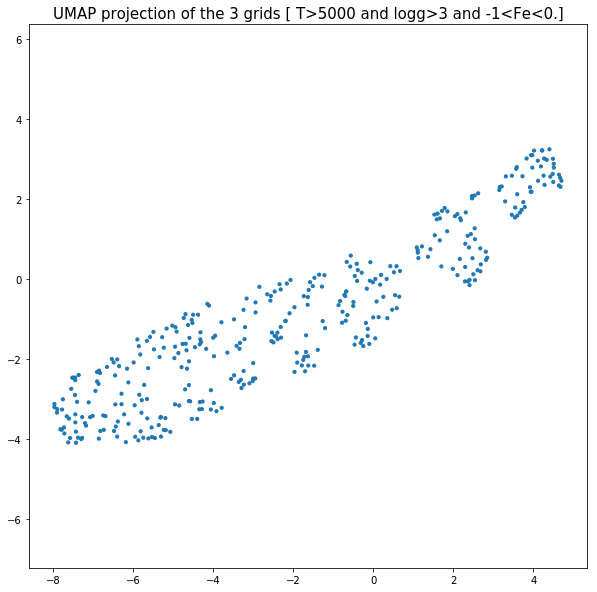

In [22]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in grid_target],s = 10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the 3 grids [ T>5000 and logg>3 and -1<Fe<0.]', fontsize=15);
plt.savefig('umap_params_goss.png')
#Blue-intrigoss
#Green-ambre
#Orange-phoenix

In [23]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
)

In [24]:
%time embedding_train = tsne.fit(grid_data)

Iteration   50, KL divergence  2.3777, 50 iterations in 0.4065 sec
Iteration  100, KL divergence  2.3564, 50 iterations in 0.3319 sec
Iteration  150, KL divergence  2.3179, 50 iterations in 0.3269 sec
Iteration  200, KL divergence  2.2966, 50 iterations in 0.3279 sec
Iteration  250, KL divergence  2.2990, 50 iterations in 0.3281 sec
Iteration   50, KL divergence  0.8563, 50 iterations in 0.3264 sec
Iteration  100, KL divergence  0.7853, 50 iterations in 0.6224 sec
Iteration  150, KL divergence  0.7714, 50 iterations in 1.1929 sec
Iteration  200, KL divergence  0.7621, 50 iterations in 0.5458 sec
Iteration  250, KL divergence  0.7564, 50 iterations in 1.4834 sec
Iteration  300, KL divergence  0.7510, 50 iterations in 1.5917 sec
Iteration  350, KL divergence  0.7471, 50 iterations in 1.5991 sec
Iteration  400, KL divergence  0.7462, 50 iterations in 2.0353 sec
Iteration  450, KL divergence  0.7420, 50 iterations in 0.8312 sec
Iteration  500, KL divergence  0.7415, 50 iterations in 1.0410

In [25]:
embedding_train.shape

(911, 2)

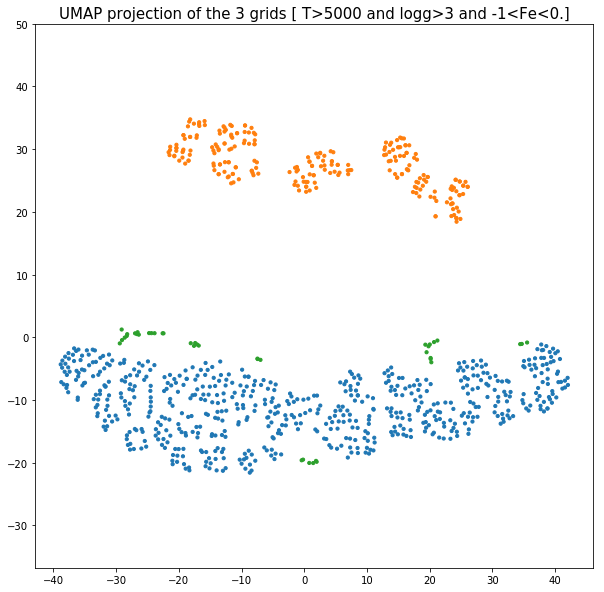

In [26]:
#utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(embedding_train[:, 0], embedding_train[:, 1], c=[sns.color_palette()[x] for x in grid_target],s = 10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the 3 grids [ T>5000 and logg>3 and -1<Fe<0.]', fontsize=15);
plt.savefig('umap_params_goss.png')